Set Up Import Library

In [ ]:
# Basic setup
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#Data Overview

In [ ]:
#Load dataset
df = pd.read_csv('Airlines.csv')

# Check the shape of the dataset (number of rows and columns)
print("Dataset shape:", df.shape)

# Display column names
print("\nColumn names:")
print(df.columns.tolist())

# Show general information (data types, non-null counts, memory usage)
print("\nDataset info:")
print(df.info())

# Display the first 5 rows of the dataset
print("\nFirst 5 rows:")
df.head()


Dataset shape: (539383, 9)

Column names:
['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length', 'Delay']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB
None

First 5 rows:


,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


#Data Cleaning

In [ ]:
#Check Missing Value
print("Missing values per column:")
print(df.isnull().sum())

#Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

#Drop duplicate rows if any
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)

Missing values per column:
id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

Number of duplicate rows: 0
Shape after dropping duplicates: (539383, 9)


In [ ]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.60446,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [ ]:
jumlah_baris_length_nol = (df['Length'] == 0).sum()
print(f"Jumlah baris dengan 'Length' = 0 adalah: {jumlah_baris_length_nol}")

Jumlah baris dengan 'Length' = 0 adalah: 4


In [ ]:
#Drop row that have 0 value
df = df[df['Length']> 0]

#Exploratory Data Analysis

##Univariate Analysis

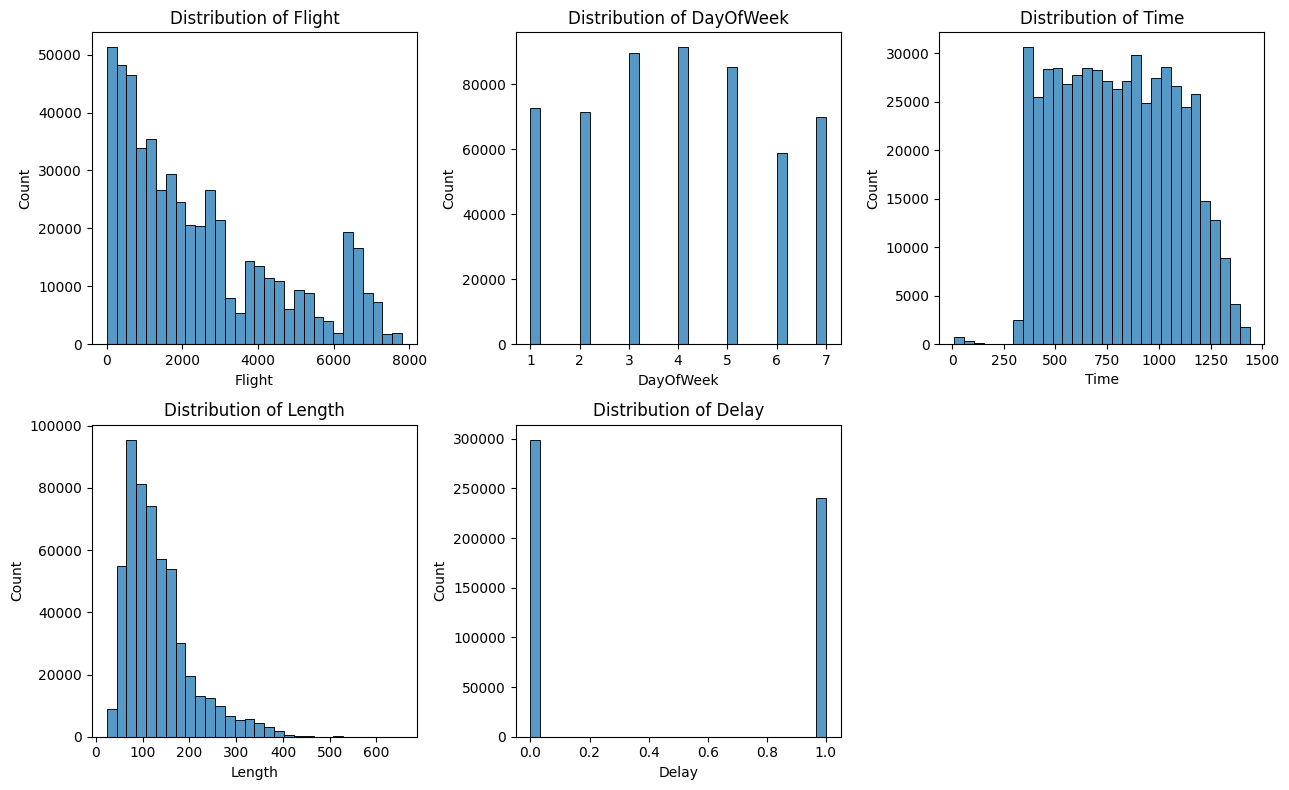

In [ ]:
#Analyze distribution of Key Numerical Variables
# Drop ID column (not useful for analysis)
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.drop('id')

# Set grid layout: 3 plots per row
n_cols = 3
n_rows = -(-len(numeric_cols) // n_cols)  # ceiling division to get number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(13, 4*n_rows))
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=30, kde=False, color='#1f77b4', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Remove unused subplots if the number of columns is not a multiple of 3
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##Bivariate Analysis

/tmp/ipython-input-2378688521.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Delay", y=col, data=df, palette="Set2", ax=axes[i])
/tmp/ipython-input-2378688521.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Delay", y=col, data=df, palette="Set2", ax=axes[i])
/tmp/ipython-input-2378688521.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Delay", y=col, data=df, palette="Set2", ax=axes[i])
/tmp/ipython-input-2378688521.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in 

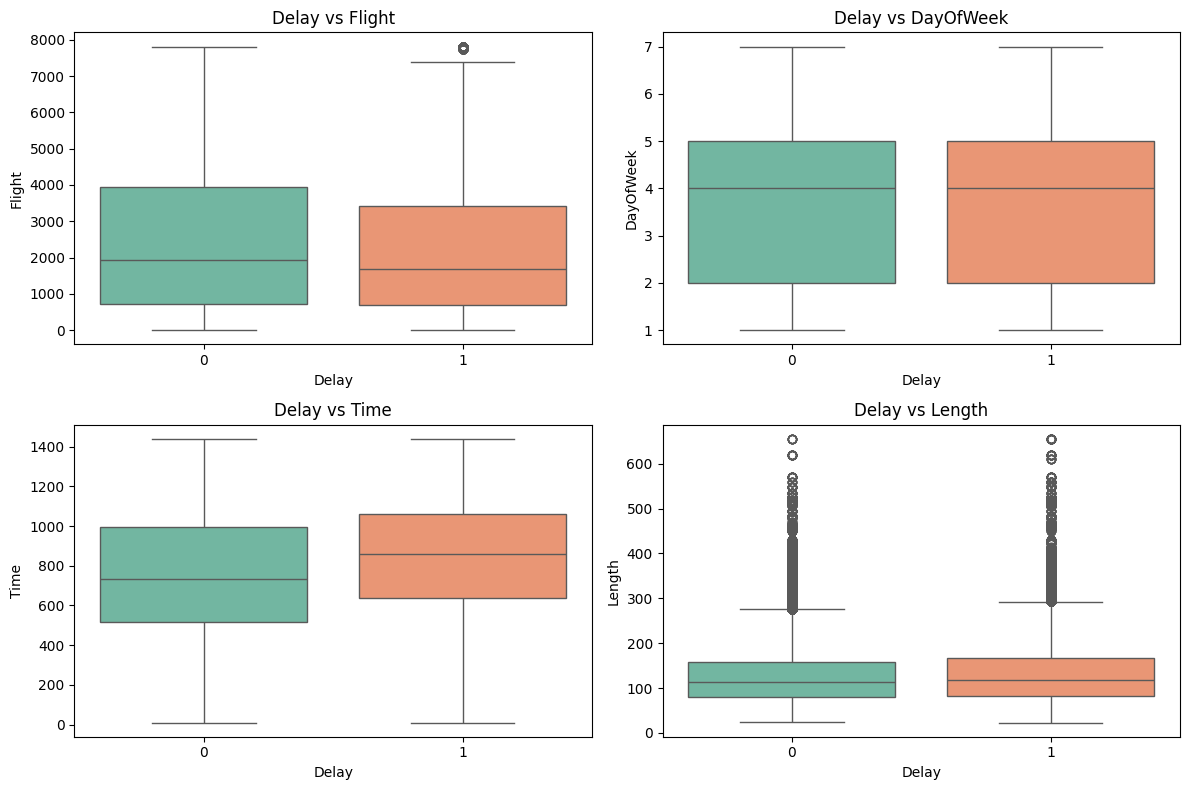

In [ ]:
# Drop "Delay" from numeric columns (to avoid Delay vs Delay)
numeric_cols_no_target = numeric_cols.drop("Delay")

# Define grid size: 2 plots per row
n_cols = 2
n_rows = -(-len(numeric_cols_no_target) // n_cols)  # ceiling division

# Adjust figsize: width proportional to columns, height proportional to rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
axes = axes.flatten()

# Plot each numerical variable vs Delay
for i, col in enumerate(numeric_cols_no_target):
    sns.boxplot(x="Delay", y=col, data=df, palette="Set2", ax=axes[i])
    axes[i].set_title(f"Delay vs {col}")

# Remove unused subplots if not multiple of 2
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

📊 Insights from Boxplots (Delay vs Numerical Variables)

*   Flight:

Although the median and spread differ between delayed and non-delayed flights (with non-delayed flights showing a higher median and wider spread), this variable represents flight IDs. Therefore, it has little predictive power and should not be considered a meaningful feature.

*   DayOfWeek:

The distributions of delayed and non-delayed flights are nearly identical across the days of the week. This suggests that the day of departure has little to no impact on the likelihood of delays.

*   Time

There is a noticeable difference in the median departure times. Delayed flights tend to depart later in the day compared to on-time flights. This indicates that flights scheduled in the afternoon or evening may be more prone to delays.

*   Length:

Flights with longer durations show a slightly higher median for delays compared to on-time flights. This suggests that longer flights might be somewhat more susceptible to delays, although the difference is not very large.

/tmp/ipython-input-2339647477.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Airline", y="Delay", data=delay_rate_by_airline, palette="viridis")


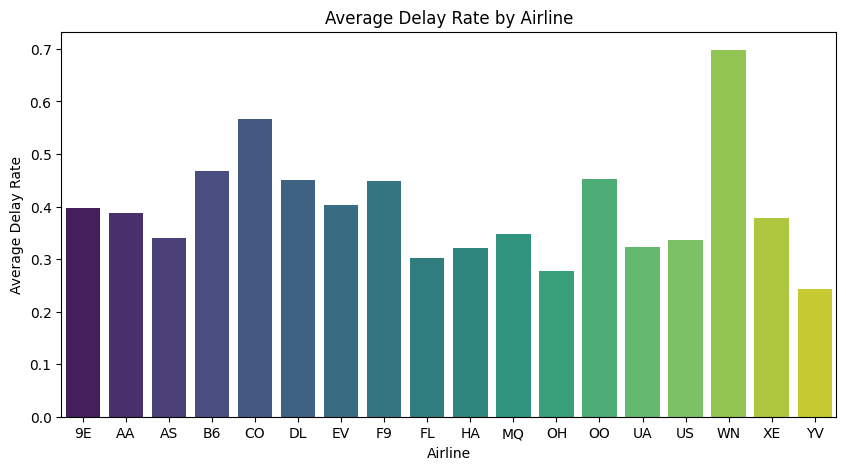

Average Delay Rate per Airline:

   Airline     Delay
15      WN  0.697759
4       CO  0.566199
3       B6  0.467009
12      OO  0.452899
5       DL  0.450476
7       F9  0.449248
6       EV  0.402208
0       9E  0.397660
1       AA  0.388470
16      XE  0.378944
10      MQ  0.348095
2       AS  0.339290
14      US  0.335971
13      UA  0.323907
9       HA  0.320186
8       FL  0.301292
11      OH  0.277276
17      YV  0.242914


In [ ]:
# Pre-calculate delay rate per airline
delay_rate_by_airline = df.groupby("Airline")["Delay"].mean().reset_index()

# Plot the result
plt.figure(figsize=(10,5))
sns.barplot(x="Airline", y="Delay", data=delay_rate_by_airline, palette="viridis")
plt.title("Average Delay Rate by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Delay Rate")
plt.show()

# Also print the summary table
print("Average Delay Rate per Airline:\n")
print(delay_rate_by_airline.sort_values("Delay", ascending=False))


#Correlation Matrix

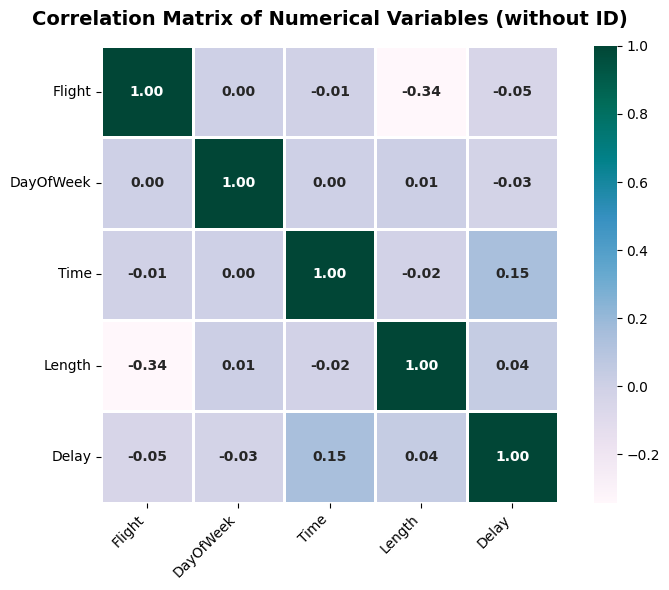

In [ ]:
# Drop kolom id
num_df = df.select_dtypes(include=['number']).drop(columns=['id'], errors='ignore')

# Hitung correlation
corr = num_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="PuBuGn",  # warna elegan
    cbar=True,
    square=True,
    linewidths=0.8,
    annot_kws={"size":10, "weight":"bold"}
)

plt.title("Correlation Matrix of Numerical Variables (without ID)", fontsize=14, fontweight="bold", pad=15)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

*   There is no strong correlation between the numerical variables and Delay.

*   The only somewhat noticeable relationship is between Flight and Length (-0.34), but this is not directly related to delay.

*   In other words, numerical factors alone may not be sufficient to explain Delay, suggesting the need to explore categorical variables or apply further feature engineering.





#Data Pre-Processing

##Feature eng

In [ ]:
# Delay Rate per Airline
airline_delay_rate = df.groupby("Airline")["Delay"].mean().reset_index()
airline_delay_rate.rename(columns={"Delay": "Airline_DelayRate"}, inplace=True)

# Merge ke dataset utama
df = df.merge(airline_delay_rate, on="Airline", how="left")


In [ ]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Airline_DelayRate
0,1,CO,269,SFO,IAH,3,15,205,1,0.566199
1,2,US,1558,PHX,CLT,3,15,222,1,0.335971
2,3,AA,2400,LAX,DFW,3,20,165,1,0.388470
3,4,AA,2466,SFO,DFW,3,20,195,1,0.388470
4,5,AS,108,ANC,SEA,3,30,202,0,0.339290


In [ ]:
airline_delay_rate

,Airline,Airline_DelayRate
0,9E,0.397660
1,AA,0.388470
2,AS,0.339290
3,B6,0.467009
4,CO,0.566199
5,DL,0.450476
6,EV,0.402208
7,F9,0.449248
8,FL,0.301292
9,HA,0.320186


In [ ]:
#Hour Bin
df["Hour"] = df["Time"] // 100   # contoh: 1530 -> 15
df["Hour_Bin"] = pd.cut(df["Hour"],
                        bins=[0, 6, 12, 18, 24],
                        labels=["Night", "Morning", "Afternoon", "Evening"],
                        right=False)

le = LabelEncoder()
df["Hour_Bin_enc"] = le.fit_transform(df["Hour_Bin"])

In [ ]:
print('Hour',df.Hour.unique())
print('Hour Enc',df.Hour_Bin_enc.unique())

Hour [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Hour Enc [2 1 0]


In [ ]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Airline_DelayRate,Hour,Hour_Bin,Hour_Bin_enc
0,1,CO,269,SFO,IAH,3,15,205,1,0.566199,0,Night,2
1,2,US,1558,PHX,CLT,3,15,222,1,0.335971,0,Night,2
2,3,AA,2400,LAX,DFW,3,20,165,1,0.388470,0,Night,2
3,4,AA,2466,SFO,DFW,3,20,195,1,0.388470,0,Night,2
4,5,AS,108,ANC,SEA,3,30,202,0,0.339290,0,Night,2


In [ ]:
#--- 1. AFlight Count per Airport ---
#Hitung jumlah penerbangan per AirportFrom (departure airport) dalam 1 hari.
#Bandara dengan banyak flight biasanya lebih rentan delay.
airport_traffic = df.groupby(
    ["AirportFrom", "DayOfWeek"])["id"].count().reset_index()
airport_traffic.rename(
    columns={"id": "DeparturesPerDay"},
    inplace=True)
df = df.merge(
    airport_traffic,
    on=["AirportFrom", "DayOfWeek"],
    how="left")


In [ ]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Airline_DelayRate,Hour,Hour_Bin,Hour_Bin_enc,DeparturesPerDay
0,1,CO,269,SFO,IAH,3,15,205,1,0.566199,0,Night,2,1952
1,2,US,1558,PHX,CLT,3,15,222,1,0.335971,0,Night,2,2578
2,3,AA,2400,LAX,DFW,3,20,165,1,0.388470,0,Night,2,2745
3,4,AA,2466,SFO,DFW,3,20,195,1,0.388470,0,Night,2,1952
4,5,AS,108,ANC,SEA,3,30,202,0,0.339290,0,Night,2,214


In [ ]:
# --- 2. Arrival Congestion ---
# Hitung jumlah flight yang mendarat di setiap bandara per hari
arrival_congestion = (
    df.groupby(["AirportTo", "DayOfWeek"])["id"]
      .count()
      .reset_index()
      .rename(columns={"id": "ArrivalsPerDay"})
)

# Merge ke dataframe utama
df = df.merge(arrival_congestion, on=["AirportTo", "DayOfWeek"], how="left")


# --- 3. Peak Hour Congestion ---
# Pastikan sudah ada kolom Hour (hasil ekstraksi dari Time)
if "Hour" not in df.columns:
    df["Hour"] = df["Time"] // 100   # contoh: 1530 -> 15

# Hitung jumlah flight yang berangkat dari bandara tertentu pada jam tertentu
peak_hour_congestion = (
    df.groupby(["AirportFrom", "Hour"])["id"]
      .count()
      .reset_index()
      .rename(columns={"id": "DeparturesPerHour"})
)

# Merge ke dataframe utama
df = df.merge(peak_hour_congestion, on=["AirportFrom", "Hour"], how="left")

# --- Cek hasil ---
print(df[["AirportFrom", "AirportTo", "DayOfWeek", "Hour",
          "ArrivalsPerDay", "DeparturesPerHour"]].head())


  AirportFrom AirportTo  DayOfWeek  Hour  ArrivalsPerDay  DeparturesPerHour
0         SFO       IAH          3     0            2473                100
1         PHX       CLT          3     0            1909                261
2         LAX       DFW          3     0            3695                159
3         SFO       DFW          3     0            3695                100
4         ANC       SEA          3     0            1326                156


In [ ]:
# ================================
# Airport Delay Rate (Departure & Arrival)
# ================================

# Delay rate berdasarkan bandara asal (AirportFrom)
airport_from_delay = (
    df.groupby("AirportFrom")["Delay"]
    .mean()
    .reset_index()
    .rename(columns={"Delay": "AirportFrom_DelayRate"})
)

# Delay rate berdasarkan bandara tujuan (AirportTo)
airport_to_delay = (
    df.groupby("AirportTo")["Delay"]
    .mean()
    .reset_index()
    .rename(columns={"Delay": "AirportTo_DelayRate"})
)

# Merge kembali ke dataframe utama
df = df.merge(airport_from_delay, on="AirportFrom", how="left")
df = df.merge(airport_to_delay, on="AirportTo", how="left")

# Cek hasil
print(df[["AirportFrom", "AirportFrom_DelayRate",
          "AirportTo", "AirportTo_DelayRate"]].head())


  AirportFrom  AirportFrom_DelayRate AirportTo  AirportTo_DelayRate
0         SFO               0.532920       IAH             0.402933
1         PHX               0.439931       CLT             0.319799
2         LAX               0.496488       DFW             0.318151
3         SFO               0.532920       DFW             0.318151
4         ANC               0.317521       SEA             0.486258


In [ ]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Airline_DelayRate,Hour,Hour_Bin,Hour_Bin_enc,DeparturesPerDay,ArrivalsPerDay,DeparturesPerHour,AirportFrom_DelayRate,AirportTo_DelayRate
0,1,CO,269,SFO,IAH,3,15,205,1,0.566199,0,Night,2,1952,2473,100,0.532920,0.402933
1,2,US,1558,PHX,CLT,3,15,222,1,0.335971,0,Night,2,2578,1909,261,0.439931,0.319799
2,3,AA,2400,LAX,DFW,3,20,165,1,0.388470,0,Night,2,2745,3695,159,0.496488,0.318151
3,4,AA,2466,SFO,DFW,3,20,195,1,0.388470,0,Night,2,1952,3695,100,0.532920,0.318151
4,5,AS,108,ANC,SEA,3,30,202,0,0.339290,0,Night,2,214,1326,156,0.317521,0.486258


In [ ]:
# Pilih hanya kolom numerik
num_cols = df.select_dtypes(include=['int64','float64']).columns

# Hitung korelasi tiap fitur numerik dengan target Delay
corr_with_delay = df[num_cols].corrwith(df["Delay"]).sort_values(ascending=False)

print("Correlation of numerical features with Delay:\n")
print(corr_with_delay)


Correlation of numerical features with Delay:

Delay                    1.000000
Airline_DelayRate        0.266102
AirportFrom_DelayRate    0.179942
AirportTo_DelayRate      0.167566
Hour                     0.150783
Time                     0.150450
id                       0.139757
Length                   0.040485
DeparturesPerDay         0.023646
DeparturesPerHour        0.018243
DayOfWeek               -0.026197
Flight                  -0.046179
ArrivalsPerDay          -0.053273
Hour_Bin_enc            -0.137732
dtype: float64


# Train Test Split (and Scaling)

In [ ]:
# === 1. Pilih fitur (drop target, id, dan kolom kategorikal string) ===
drop_cols = ["Delay", "id", "Airline", "AirportFrom", "AirportTo", "Hour_Bin"]
X = df.drop(columns=drop_cols)
y = df["Delay"]

# === 2. Train-Test Split ===
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # biar distribusi kelas sama
)

# === 3. Scaling (hanya numerik) ===
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Convert kembali ke DataFrame biar rapi
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled  = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


#Cek imbalance

In [ ]:
# === Cek distribusi target ===
print("Train target distribution:\n", y_train.value_counts(normalize=True))
print("Test target distribution:\n", y_test.value_counts(normalize=True))

# === Output info ===
print(f"Subset training shape: {X_train.shape}")
print(f"Subset test shape: {X_test.shape}")

Train target distribution:
 Delay
0    0.554557
1    0.445443
Name: proportion, dtype: float64
Test target distribution:
 Delay
0    0.554553
1    0.445447
Name: proportion, dtype: float64
Subset training shape: (431503, 12)
Subset test shape: (107876, 12)


#Modeling

In [ ]:
# === Import libraries ===
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Take 10% subset from train & test for faster experimentation
X_train_sub, _, y_train_sub, _ = train_test_split(
    X_train_scaled, y_train, test_size=0.90, random_state=42, stratify=y_train
)

X_test_sub, _, y_test_sub, _ = train_test_split(
    X_test_scaled, y_test, test_size=0.90, random_state=42, stratify=y_test
)

# === Define models ===
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42
    ),
    "SVM": SVC(kernel="rbf", probability=False, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}


#Model Evaluation

In [ ]:
results_subset = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_sub, y_train_sub)

    y_pred = model.predict(X_test_sub)

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_sub)[:, 1]
    else:
        y_prob = model.decision_function(X_test_sub)  # fallback untuk SVM

    # metrik
    acc  = accuracy_score(y_test_sub, y_pred)
    prec = precision_score(y_test_sub, y_pred)
    rec  = recall_score(y_test_sub, y_pred)
    f1   = f1_score(y_test_sub, y_pred)
    roc  = roc_auc_score(y_test_sub, y_prob)

    results_subset[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "ROC-AUC": roc
    }

results_df_subset = pd.DataFrame(results_subset).T
print("\nQuick comparison on 10% subset:")
print(results_df_subset.sort_values(by="ROC-AUC", ascending=False).round(4))


Training Logistic Regression...

Training Random Forest...

Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:36:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Training SVM...

Training KNN...

Quick comparison on 10% subset:
                     Accuracy  Precision  Recall  F1 Score  ROC-AUC
XGBoost                0.6514     0.6317  0.5215    0.5714   0.6960
Logistic Regression    0.6449     0.6370  0.4712    0.5417   0.6901
SVM                    0.6520     0.6834  0.4075    0.5106   0.6872
Random Forest          0.6298     0.5944  0.5322    0.5615   0.6690
KNN                    0.6193     0.5795  0.5294    0.5533   0.6462


#Hyperparameter Tuning

##RandomForest

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, accuracy_score
import numpy as np
#RandomizedSearchCV – Random Forest (subset 10% )
param_dist_rf = {
    "n_estimators": np.arange(50, 150, 25),   # 50, 75, 100, 125
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"],
    "class_weight": [None, "balanced"]
}

random_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=10,
    scoring="recall",      # fokus recall
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

random_rf.fit(X_train_sub, y_train_sub)

print("Best RF params (subset):", random_rf.best_params_)
print("Best RF recall (subset):", random_rf.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best RF params (subset): {'n_estimators': np.int64(50), 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'class_weight': 'balanced'}
Best RF recall (subset): 0.5915405025753082


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, accuracy_score

# === Pakai best params dari subset ===
best_params_subset = {
    'n_estimators': 50,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'max_depth': 10,
    'class_weight': 'balanced'
}

# Train ulang di full dataset
rf_full = RandomForestClassifier(
    **best_params_subset,
    random_state=42,
    n_jobs=-1
)

rf_full.fit(X_train_scaled, y_train)

# Prediksi
y_pred_full = rf_full.predict(X_test_scaled)
y_pred_prob = rf_full.predict_proba(X_test_scaled)[:, 1]  # untuk ROC-AUC

# Evaluasi
print("=== Classification Report ===")
print(classification_report(y_test, y_pred_full, digits=3))

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_full))

print("=== Custom Metrics ===")
print("Accuracy :", accuracy_score(y_test, y_pred_full))
print("Recall   :", recall_score(y_test, y_pred_full))
print("Precision:", precision_score(y_test, y_pred_full))
print("ROC-AUC  :", roc_auc_score(y_test, y_pred_prob))


=== Classification Report ===
              precision    recall  f1-score   support

           0      0.684     0.694     0.689     59823
           1      0.612     0.601     0.606     48053

    accuracy                          0.652    107876
   macro avg      0.648     0.647     0.648    107876
weighted avg      0.652     0.652     0.652    107876

=== Confusion Matrix ===
[[41517 18306]
 [19187 28866]]
=== Custom Metrics ===
Accuracy : 0.652443546293893
Recall   : 0.6007117141489605
Precision: 0.6119308064105825
ROC-AUC  : 0.7093131086986509


##XGBoost

In [ ]:
# === Randomized Search untuk XGBoost (pakai subset) ===
param_dist_xgb = {
    "n_estimators": np.arange(50, 200, 50),     # jumlah boosting round
    "max_depth": [3, 5, 7, 10],                # kedalaman tree
    "learning_rate": [0.01, 0.05, 0.1, 0.2],   # step shrinkage
    "subsample": [0.7, 0.8, 1.0],              # sampling row
    "colsample_bytree": [0.7, 0.8, 1.0],       # sampling fitur
    "scale_pos_weight": [1]                    # kalau imbalance bisa diset >1
}

random_xgb = RandomizedSearchCV(
    XGBClassifier(
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1
    ),
    param_distributions=param_dist_xgb,
    n_iter=10,                # sampling 10 kombinasi
    scoring="recall",         # fokus recall
    cv=3,
    verbose=2,
    random_state=42
)

# Fit di subset
random_xgb.fit(X_train_sub, y_train_sub)

print("Best XGB params (subset):", random_xgb.best_params_)
print("Best XGB recall (subset):", random_xgb.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:43:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=50, scale_pos_weight=1, subsample=0.8; total time=   1.8s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:43:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=50, scale_pos_weight=1, subsample=0.8; total time=   0.8s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:43:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=50, scale_pos_weight=1, subsample=0.8; total time=   0.8s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:43:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=1, subsample=0.7; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:43:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=1, subsample=0.7; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:43:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=1, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=50, scale_pos_weight=1, subsample=0.7; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:43:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:43:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=50, scale_pos_weight=1, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=50, scale_pos_weight=1, subsample=0.7; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:43:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:43:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, scale_pos_weight=1, subsample=0.7; total time=   1.7s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:43:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, scale_pos_weight=1, subsample=0.7; total time=   1.7s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:43:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, scale_pos_weight=1, subsample=0.7; total time=   1.6s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:43:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   1.6s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:43:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   3.6s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:43:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   1.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:43:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.6s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:43:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.6s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:43:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.6s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:43:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=50, scale_pos_weight=1, subsample=0.7; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:43:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=50, scale_pos_weight=1, subsample=0.7; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:43:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=50, scale_pos_weight=1, subsample=0.7; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:43:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=50, scale_pos_weight=1, subsample=0.8; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:43:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=50, scale_pos_weight=1, subsample=0.8; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:43:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=50, scale_pos_weight=1, subsample=0.8; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:43:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=150, scale_pos_weight=1, subsample=0.7; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:43:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=150, scale_pos_weight=1, subsample=0.7; total time=   0.6s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:43:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=150, scale_pos_weight=1, subsample=0.7; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:44:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:44:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:44:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:44:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGB params (subset): {'subsample': 0.8, 'scale_pos_weight': 1, 'n_estimators': np.int64(50), 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Best XGB recall (subset): 0.5289006815462255


In [ ]:
# === Train ulang pakai best params di full dataset ===
best_params_xgb = random_xgb.best_params_

xgb_full = XGBClassifier(
    **best_params_xgb,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

xgb_full.fit(X_train_scaled, y_train)

# Prediksi
y_pred_xgb = xgb_full.predict(X_test_scaled)
y_pred_xgb_prob = xgb_full.predict_proba(X_test_scaled)[:, 1]

# Evaluasi
print("\n=== Classification Report (XGB) ===")
print(classification_report(y_test, y_pred_xgb, digits=3))

print("=== Confusion Matrix (XGB) ===")
print(confusion_matrix(y_test, y_pred_xgb))

print("=== Custom Metrics (XGB) ===")
print("Accuracy :", accuracy_score(y_test, y_pred_xgb))
print("Recall   :", recall_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("ROC-AUC  :", roc_auc_score(y_test, y_pred_xgb_prob))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:44:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Classification Report (XGB) ===
              precision    recall  f1-score   support

           0      0.672     0.787     0.725     59823
           1      0.663     0.523     0.585     48053

    accuracy                          0.669    107876
   macro avg      0.668     0.655     0.655    107876
weighted avg      0.668     0.669     0.663    107876

=== Confusion Matrix (XGB) ===
[[47066 12757]
 [22929 25124]]
=== Custom Metrics (XGB) ===
Accuracy : 0.669194260076384
Recall   : 0.5228393648679583
Precision: 0.6632348670837623
ROC-AUC  : 0.7228556895676965


#Model Selection

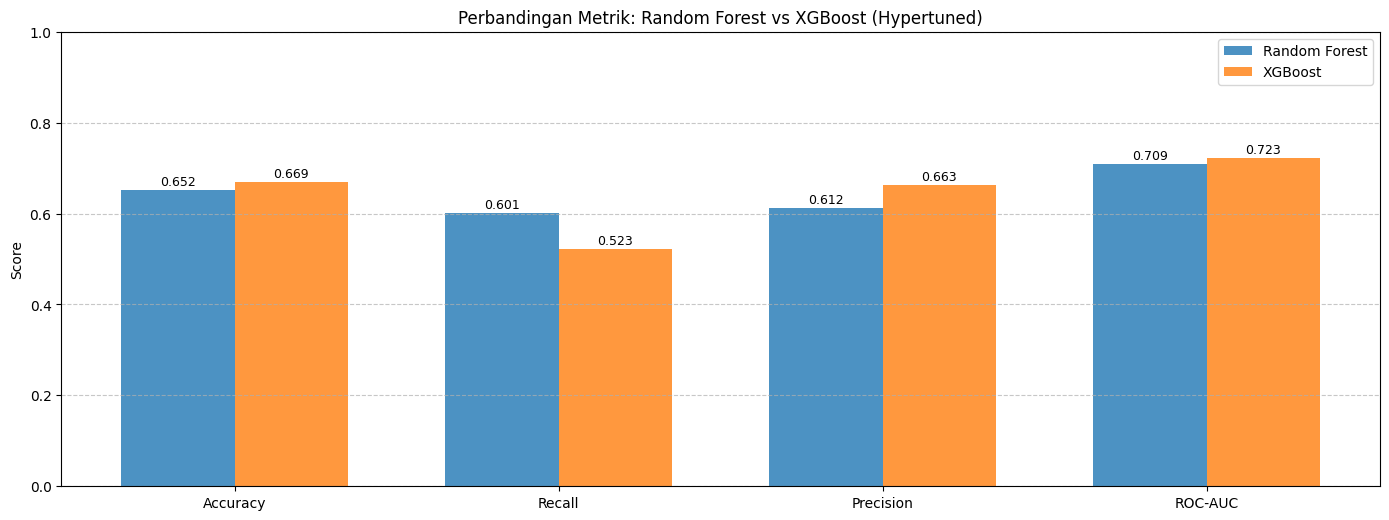

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# === Metrics dari hasil evaluasi ===
metrics = ["Accuracy", "Recall", "Precision", "ROC-AUC"]
rf_scores = [0.652, 0.601, 0.612, 0.709]
xgb_scores = [0.669, 0.523, 0.663, 0.723]

# === Confusion matrix data ===
cm_rf = np.array([[41517, 18306],
                  [19187, 28866]])

cm_xgb = np.array([[47066, 12757],
                   [22929, 25124]])

# === Figure: Bar Chart ===
fig = plt.figure(figsize=(14,10))

# --- Subplot 1: Bar chart perbandingan metrik ---
ax1 = plt.subplot2grid((2,2), (0,0), colspan=2)

x = np.arange(len(metrics))
bar_width = 0.35

ax1.bar(x - bar_width/2, rf_scores, width=bar_width, label="Random Forest", alpha=0.8)
ax1.bar(x + bar_width/2, xgb_scores, width=bar_width, label="XGBoost", alpha=0.8)

ax1.set_xticks(x)
ax1.set_xticklabels(metrics)
ax1.set_ylabel("Score")
ax1.set_title("Perbandingan Metrik: Random Forest vs XGBoost (Hypertuned)")
ax1.set_ylim(0,1)
ax1.legend()
ax1.grid(axis="y", linestyle="--", alpha=0.7)

# Annotasi nilai di atas bar
for i, v in enumerate(rf_scores):
    ax1.text(i - bar_width/2, v + 0.01, f"{v:.3f}", ha="center", fontsize=9)
for i, v in enumerate(xgb_scores):
    ax1.text(i + bar_width/2, v + 0.01, f"{v:.3f}", ha="center", fontsize=9)

plt.tight_layout()
plt.show()
